<a href="https://colab.research.google.com/github/akfalah/machine-learning/blob/main/2241720184_AhmadKhoirulFalah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title Import library yang diperlukan

from google.colab import drive
import zipfile
import random
import dlib
import cv2 as cv
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [2]:
# @title Mount Google Drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# @title Load Data

zip_path = '/content/drive/My Drive/kuliah/dataset.zip'

extract_path = 'images'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

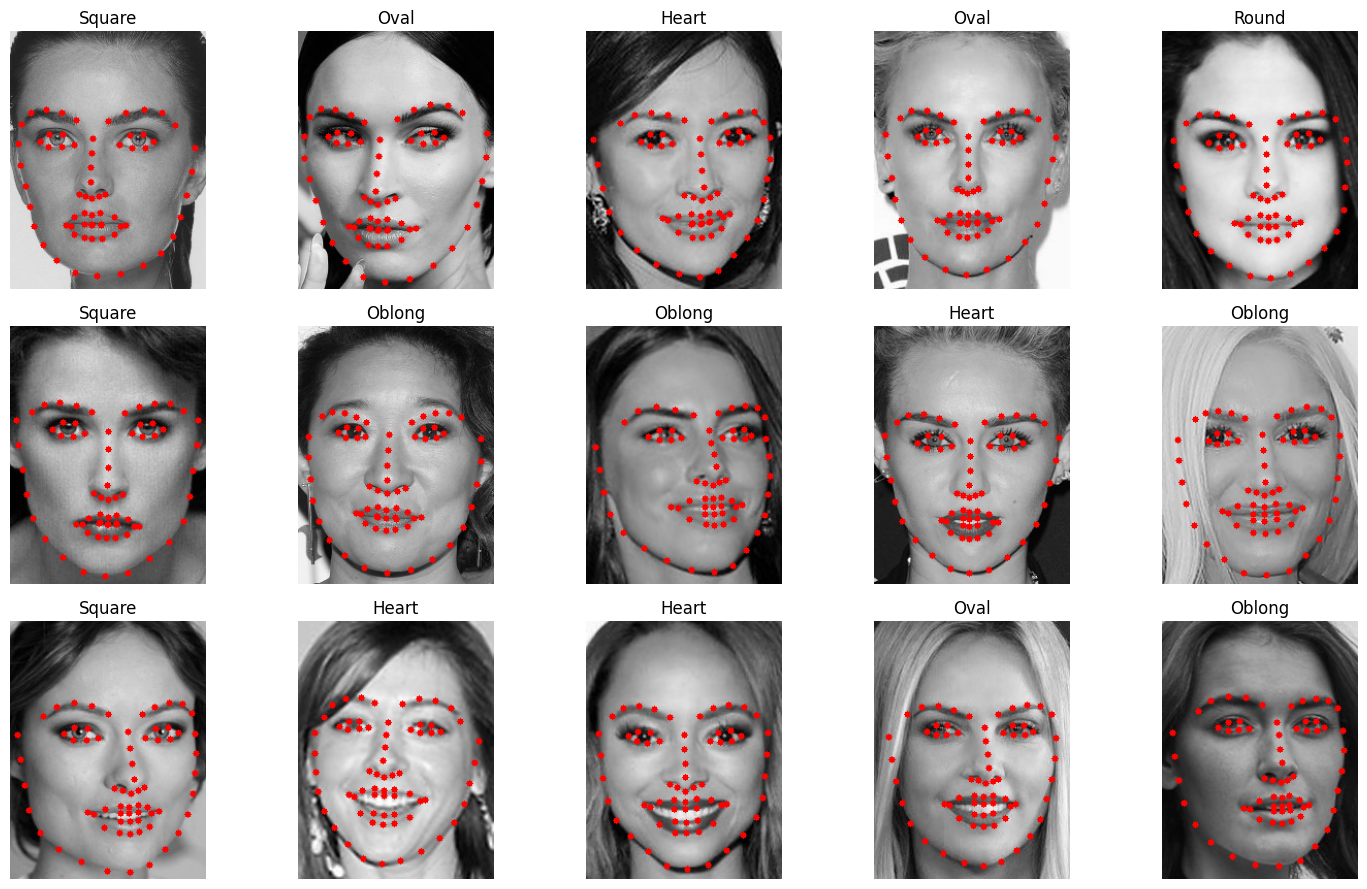

In [4]:
# @title Inisialisasi Dlib dan Contoh Visualisasi Deteksi Wajah

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('/content/drive/MyDrive/kuliah/shape_predictor_68_face_landmarks.dat')

image_dir = 'images/dataset'

image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]

selected_images = random.sample(image_files, 15)

fig, axes = plt.subplots(3, 5, figsize=(15, 9))
axes = axes.flatten()

for ax, image_file in zip(axes, selected_images):
    image_path = os.path.join(image_dir, image_file)
    image = cv.imread(image_path)
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    faces = detector(gray)

    for face in faces:
        landmarks = predictor(gray, face)
        landmarks_np = np.array([[p.x, p.y] for p in landmarks.parts()])


        for (x, y) in landmarks_np:
            cv.circle(image, (x, y), 3, (0, 0, 255), -1)

    label = image_file.split('(')[0]

    image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

    ax.imshow(image_rgb, cmap='gray')
    ax.set_title(label)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [5]:
# @title Ekstraksi Fitur dan Preprocessing

features_list = []
labels = []

def extract_features(image_path):
    img = cv.imread(image_path)

    if img is None:
        return None

    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    faces = detector(gray)

    if len(faces) == 0:
        return None

    shape = predictor(img, faces[0])
    landmarks = np.array([[p.x, p.y] for p in shape.parts()])

    return landmarks.flatten()
for filename in os.listdir(extract_path + '/dataset'):
    if filename.endswith('.jpg') or filename.endswith('.png'):

        label = filename.split('(')[0]


        features = extract_features(os.path.join(extract_path + '/dataset', filename))


        if features is not None:
            features_list.append(features)
            labels.append(label)

features_list = np.array(features_list)
labels = np.array(labels)
print("Jumlah label yang sudah diekstraksi:", len(labels))

Jumlah label yang sudah diekstraksi: 3958


In [6]:
# @title Split Data menjadi Train dan Test

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_list)

X_train, X_test, y_train, y_test = train_test_split(features_scaled, y_encoded, test_size=0.2, random_state=42)

print(f'Jumlah data pelatihan (X_train): {X_train.shape[0]}')
print(f'Jumlah data pengujian (X_test): {X_test.shape[0]}')
print(f'Jumlah label pelatihan (y_train): {len(y_train)}')
print(f'Jumlah label pengujian (y_test): {len(y_test)}')

Jumlah data pelatihan (X_train): 3166
Jumlah data pengujian (X_test): 792
Jumlah label pelatihan (y_train): 3166
Jumlah label pengujian (y_test): 792


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


317/317 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3607 - loss: 1.4832
Epoch 2/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5517 - loss: 1.0907
Epoch 3/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5966 - loss: 1.0063
Epoch 4/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6403 - loss: 0.9078
Epoch 5/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6655 - loss: 0.8582
Epoch 6/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6811 - loss: 0.8027
Epoch 7/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7202 - loss: 0.7527
Epoch 8/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7279 - loss: 0.7126
Epoch 9/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7523 - loss: 0.6674
Epoch 10/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7560 - loss: 0.6308
Epoch 11/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7810 - loss: 0.5895
Epoch 12/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy

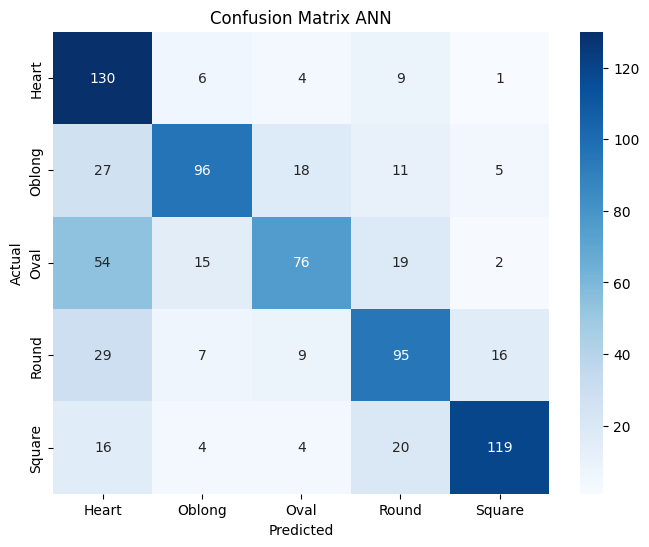

In [7]:
# @title Membangun dan Melatih Model ANN

y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(np.unique(y_train)), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train_one_hot, epochs=50, batch_size=10, verbose=1)

y_pred_test = model.predict(X_test)
y_pred_test = np.argmax(y_pred_test, axis=1)

accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'Akurasi ANN (Test): {accuracy_test}')

confusion_test = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_test, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix ANN')
plt.show()

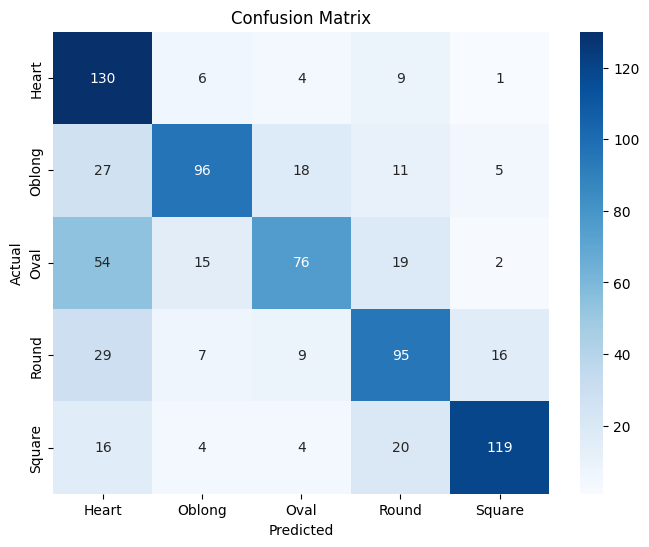

In [8]:
# @title Confusion Matrix untuk ANN

confusion_test_ann = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_test_ann, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [9]:
# @title Clustering menggunakan DBSCAN

dbscan = DBSCAN(eps=3, min_samples=2)

clusters = dbscan.fit_predict(features_scaled)

silhouette_avg = silhouette_score(features_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: -0.4987679571860915


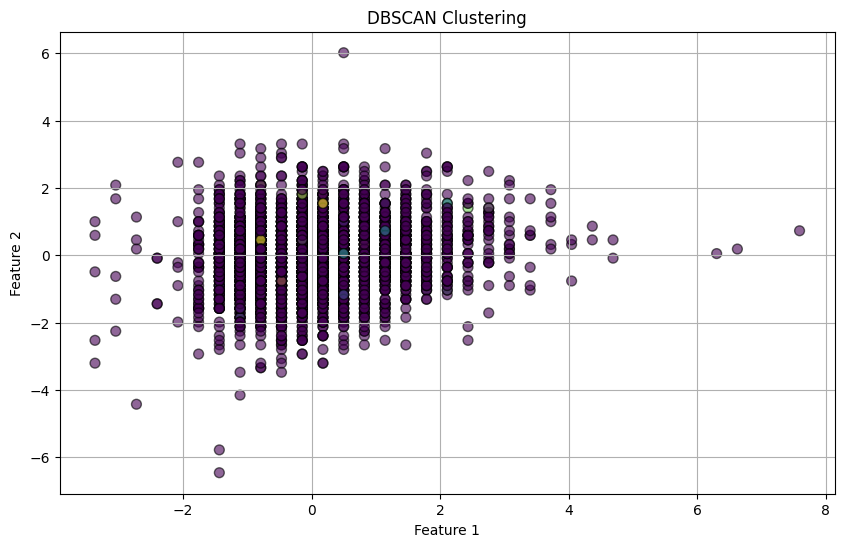

In [10]:
# @title Visualisasi Clustering

plt.figure(figsize=(10, 6))
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=clusters, cmap='viridis', marker='o', s=50, alpha=0.6, edgecolors='k')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.show()

In [11]:
# @title Evaluasi Akhir

print("Classification Report ANN (Test):")
print(classification_report(y_test, y_pred_test))

# Evaluasi Silhouette Score
print(f'Silhouette Score DBSCAN: {silhouette_avg}')

Classification Report ANN (Test):
              precision    recall  f1-score   support

           0       0.51      0.87      0.64       150
           1       0.75      0.61      0.67       157
           2       0.68      0.46      0.55       166
           3       0.62      0.61      0.61       156
           4       0.83      0.73      0.78       163

    accuracy                           0.65       792
   macro avg       0.68      0.65      0.65       792
weighted avg       0.68      0.65      0.65       792

Silhouette Score DBSCAN: -0.4987679571860915
